## Ez egy egyszerű példa hely-idő és sebesség-idő függvény számításra.
### Nem mindenütt a leghatékonyabb a megvalósítás, de Pythonban kezdőknek jobban érthető.

### Zajszűrés a Savitzky-Golay módszerrel

In [27]:
# alap beállítás és modulbetöltés
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# időértékek tömbje: N elem, dt időköz
N=1000
dt=0.01
t_tab=np.zeros(N, np.float64)
for i in range(N):
    t_tab[i]=i*dt
    
print(t_tab[-5:])

[9.95 9.96 9.97 9.98 9.99]


In [29]:
# definiálunk néhány hely-idő függvényt gyakorlási célból

# harmonikus rezgőmozgás
def xt_harm(t):  
    return(5*np.sin(3*t))

# csillapodó rezgőmozgás
def xt_csill(t):  
    return(5*np.sin(3*t)*np.exp(-0.2*t))

# egy nem igazi hely-idő függvény szakadással
def xt_szakad(t):
    if t<4:
        return(5*np.sin(t)+3)
    else:
        return(6*np.cos(t))
    
# egy oda-vissza mozgás
def xt_odavissza(t):
    return(5.0*np.exp(-(t-3)**2/(2*0.5**2)))

# egy kis változó frekvenciájú szinusz
def xt_frekvmod(t):
    fr=3.0+0.5*np.sin(t)
    return(5*np.sin(fr*t))

In [30]:
# létrehozzuk a hely-idő függvényértékek tömbjét
x_tab=np.vectorize(xt_odavissza)(t_tab)            # ez leszervezi helyettünk a ciklust is

np.set_printoptions(precision=3)
print(x_tab[:5])

[7.615e-08 8.584e-08 9.673e-08 1.090e-07 1.227e-07]


In [31]:
# most egy általános deriváló függvényt definiálunk, ami tömbökön működik
# a széleken egy oldali deriválttal, máshol centrális deriválttal közelít
# profibbak megoldhatják ezt elegánsan a NumPy vektorizáló műveleteivel

def deriv(xx_tab, ff_tab):  # itt 'xx' az általános 'x' változót jelöli, nem az 'x' helykoordinátát!
    N=xx_tab.shape[0]   # a tömb első dimenziója; hibakezelés nincs
    dff_dxx=np.zeros(N, np.float64)  # a deriváltak tömbje
    for i in range(N):
        if i==0:        # bal széle
            deriv=(ff_tab[1]-ff_tab[0])/(xx_tab[1]-xx_tab[0])
        elif i==N-1:    # jobb széle
            deriv=(ff_tab[N-1]-ff_tab[N-2])/(xx_tab[N-1]-xx_tab[N-2])
        else:          # közepe
            deriv=(ff_tab[i+1]-ff_tab[i-1])/(xx_tab[i+1]-xx_tab[i-1])
        dff_dxx[i]=deriv
    return(dff_dxx)
            

In [32]:
v_tab=deriv(t_tab, x_tab)  # most már egyszerű sebességet számolni

In [33]:
a_tab=deriv(t_tab, v_tab)  # most már a gyorsulás is könnyen jön

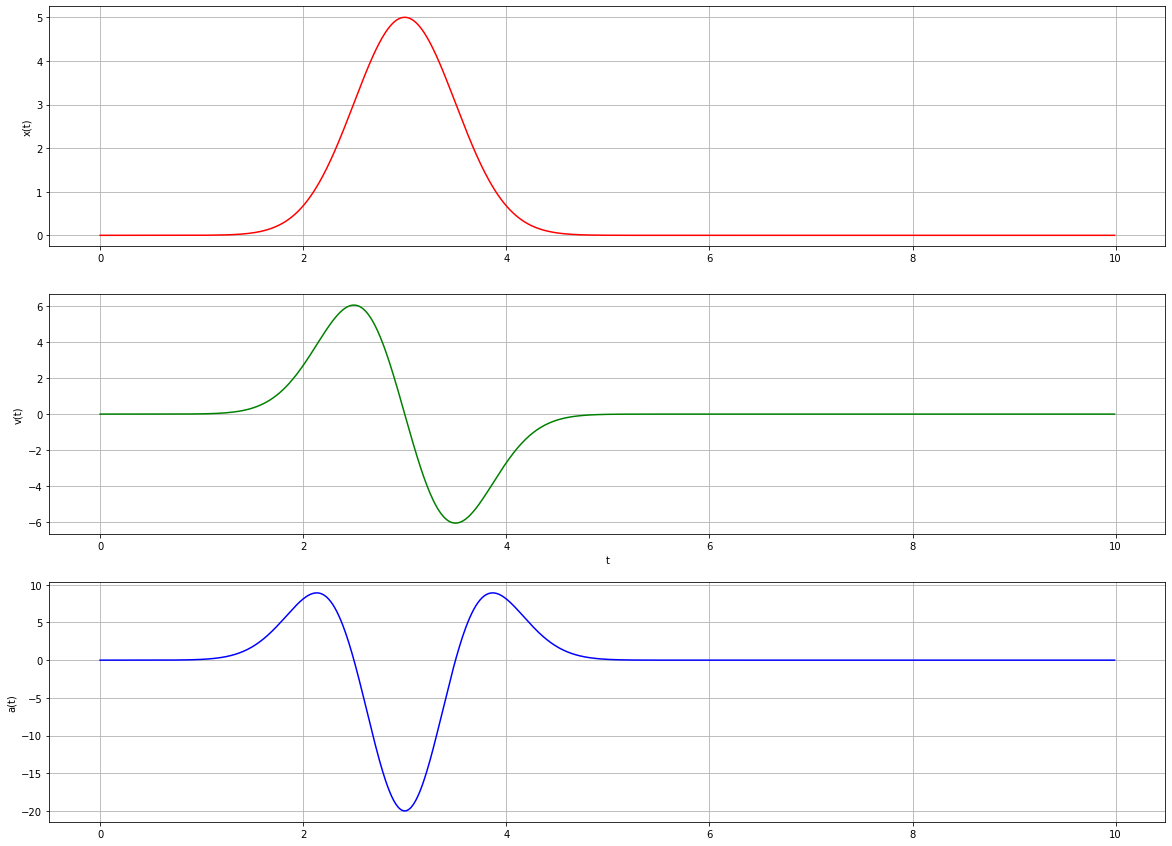

In [34]:
# rajzoljuk ki őket egymás alá
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(311) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [35]:
# most jön a visszafelé számolás
# egyszerű, józan eszes integrálás. lehetne pontosabb is, pl. a Simpson-formulával

def integral(xx_tab, ff_tab, F0=0.0):
    N=xx_tab.shape[0]   # a tömb első dimenziója; hibakezelés nincs
    intff=np.zeros(N, np.float64)  # az integrál értékek tömbje
    intff[0]=F0
    for i in range(1,N):
        intff[i]=intff[i-1]+(xx_tab[i]-xx_tab[i-1])*(ff_tab[i]+ff_tab[i-1])/2.0
    return(intff)

In [38]:
# kipróbáljuk:

v0=0.0  # ez csak önkényes érték! lehet, hogy állítani kell rajta
uj_v_tab=integral(t_tab, a_tab, v0)
x0=0.0
uj_x_tab=integral(t_tab, uj_v_tab, x0)

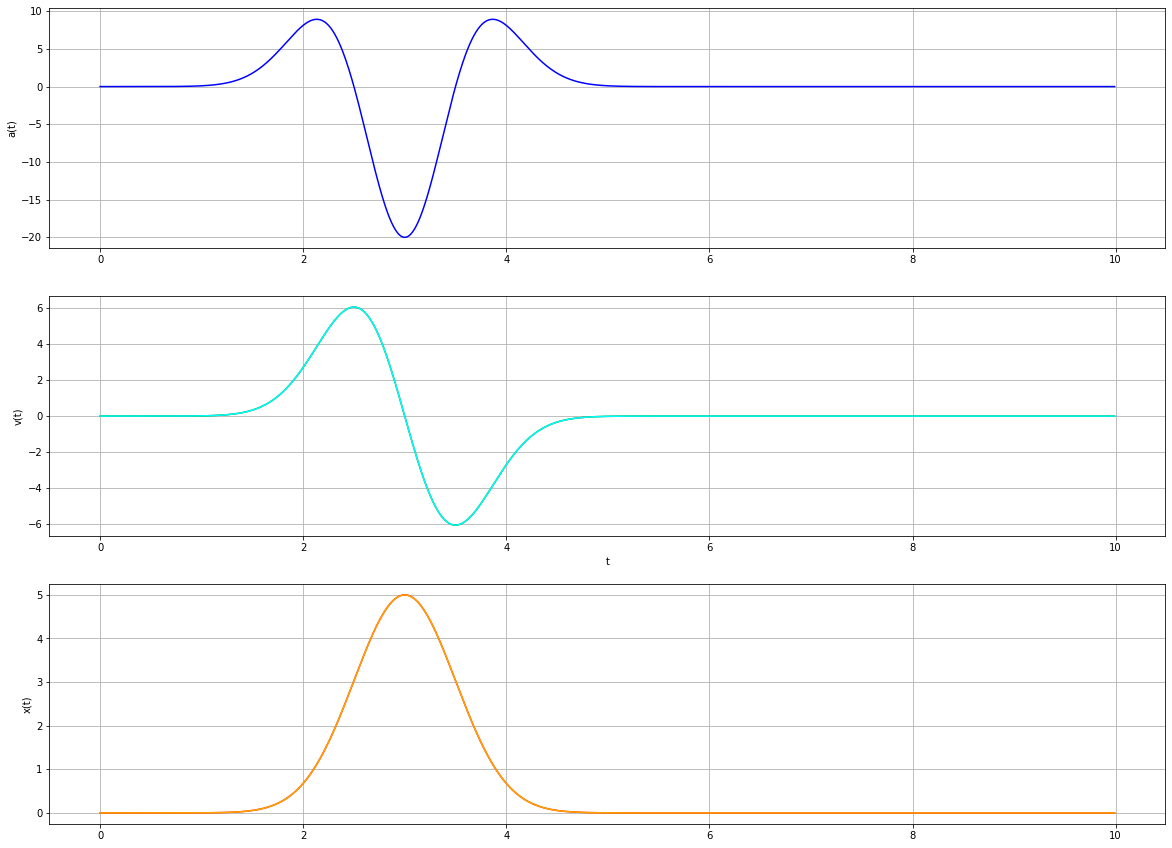

In [39]:
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(313) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(311)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax1.plot(t_tab, uj_x_tab, color="orange") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax2.plot(t_tab, uj_v_tab, color="cyan") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [12]:
x_hiba=x_tab-uj_x_tab
print(x_hiba[0:5], '\n', x_hiba[-5:])

[7.615e-08 8.546e-08 9.501e-08 1.046e-07 1.142e-07] 
 [9.720e-06 9.729e-06 9.739e-06 9.749e-06 9.758e-06]


## Most tegyünk rá egy kis zajt!

In [13]:
a_zajos=a_tab + 0.4*np.random.normal(0.0,1.0,a_tab.shape)   # normális eloszlású zaj 

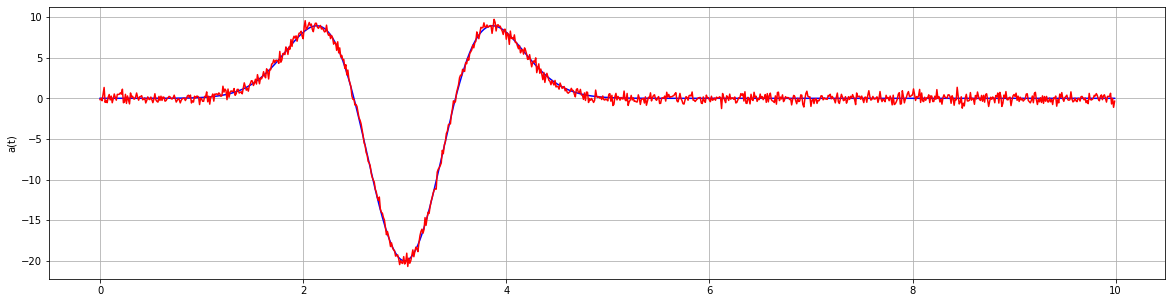

In [40]:
fig=plt.figure(figsize=(20,5))  # nagyobb rajzméret
ax1=fig.add_subplot(111) 
ax1.plot(t_tab, a_tab, color="blue") 
ax1.plot(t_tab, a_zajos, color="red") 
ax1.set_ylabel("a(t)")
ax1.grid()


In [41]:
# kipróbáljuk: most a zajosból számolunk

v0=0.0  # ez csak önkényes érték! lehet, hogy állítani kell rajta
uj_v_tab=integral(t_tab, a_zajos, v0)
x0=0.0
uj_x_tab=integral(t_tab, uj_v_tab, x0)

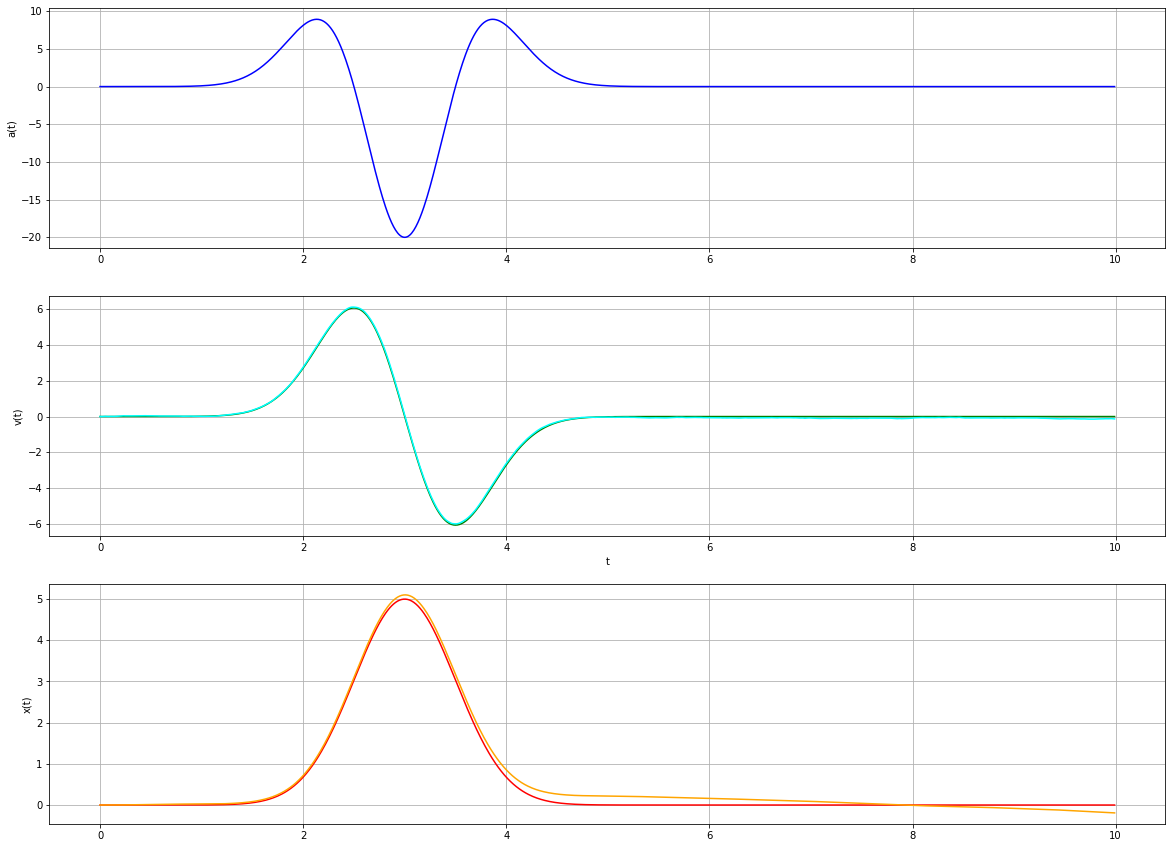

In [42]:
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(313) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(311)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax1.plot(t_tab, uj_x_tab, color="orange") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax2.plot(t_tab, uj_v_tab, color="cyan") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_tab, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [43]:
x_hiba=x_tab-uj_x_tab
print(x_hiba[0:5], '\n', x_hiba[-5:])

[7.615e-08 4.250e-06 1.987e-05 3.707e-05 2.131e-06] 
 [0.186 0.188 0.189 0.19  0.191]


In [44]:
# Most zajszűréssel

In [45]:
import scipy
from scipy import interpolate   # interpolálás: mérési adatok egyenletes közű rácsra való vetítése
from scipy.signal import savgol_filter   # zajszűrés. vannak jobb módszerek is, de ezt könnyű használni

In [46]:
# átinterpolálunk egy egyenletes közű rácsra
tstart=t_tab[0]
tend=t_tab[-1]

dt_new=0.01  # új delta t
N_new=int((tend-tstart)/dt_new)+1

t_tab_new=np.linspace(tstart, tend, N_new) # új t értékek tömbje, egyenletesen elosztva dt_new értékenként

#Interpolálás:
a_interpol=interpolate.interp1d(t_tab,a_zajos)(t_tab_new)  # a_interpol: gyorsulásértékek az egyenletes rácson


In [47]:
# és most zajszűrünk:
a_filtered=savgol_filter(a_interpol, 45, 3, mode='mirror') # savgol= Savitzky-Golay filter
# a 2. argumentum azt mutatja, hány értékre illesszen polinomot helyről helyre
# a 3. argumentum az illesztett polynom fokszáma


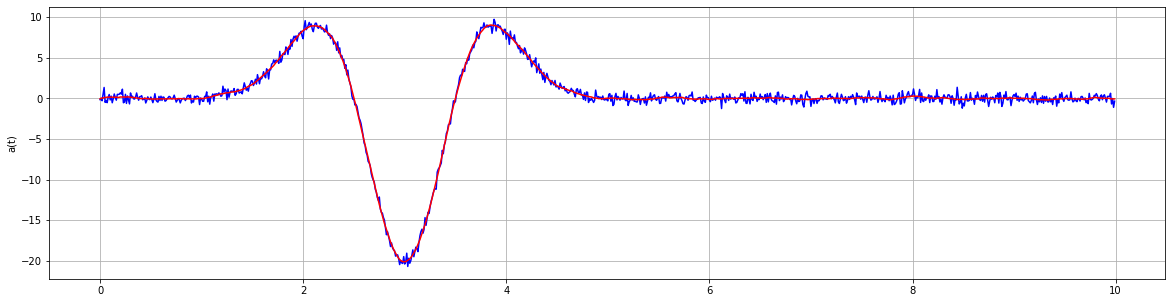

In [49]:
# szűrés eredménye
fig=plt.figure(figsize=(20,5))  # nagyobb rajzméret
ax1=fig.add_subplot(111) 
ax1.plot(t_tab_new, a_interpol, color="blue") 
ax1.plot(t_tab_new, a_filtered, color="red") 
ax1.set_ylabel("a(t)")
ax1.grid()


In [50]:
# most a szűrtből számolunk:
v0=0.0  # ez csak önkényes érték! lehet, hogy állítani kell rajta
uj_v_tab=integral(t_tab_new, a_filtered, v0)
x0=0.0
uj_x_tab=integral(t_tab_new, uj_v_tab, x0)

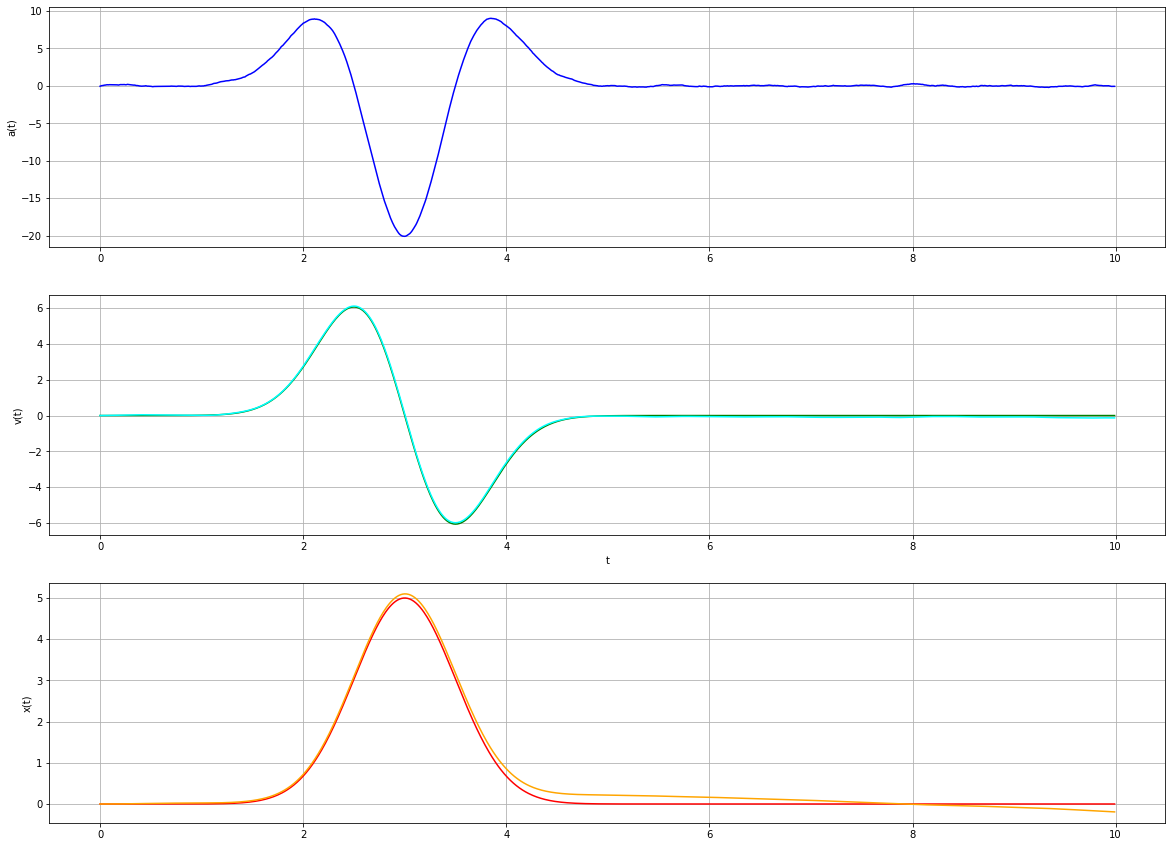

In [51]:
fig=plt.figure(figsize=(20,15))  # nagyobb rajzméret
ax1=fig.add_subplot(313) # három rész-grafikon
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(311)
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # az elsőbe az x(t)
ax1.plot(t_tab, uj_x_tab, color="orange") # az elsőbe az x(t)
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # a másodikba a v(t)
ax2.plot(t_tab, uj_v_tab, color="cyan") # a másodikba a v(t)
ax3.set_ylabel("a(t)")
ax2.set_xlabel("t")
ax3.plot(t_tab, a_filtered, color="blue") # a harmadikba az a(t)
ax1.grid()
ax2.grid()
ax3.grid()

In [52]:
x_hiba=x_tab-uj_x_tab
print(x_hiba[0:5], '\n', x_hiba[-5:])

[ 7.615e-08  1.577e-06  3.823e-06  3.513e-06 -1.718e-06] 
 [0.187 0.188 0.189 0.191 0.192]


In [26]:
# sajnos az ilyen szűrésekkel nem lehet megjavítani az a(t)->v(t)->x(t) beli hibákat
# fejlettebb szűrés: Kálmán-filter, de ez maghaladja az óra kereteit
# a Savitzky-Golay azonban jó, ha gyorsulás minimumok-maximumok értékét, helyét keressük